# COGS 108 - Final Project (Pt. 3) - Final Submission
# Examining Macroeconomic Variables and Their Effect on Housing Prices

# Overview

In this project, we examined how housing prices were impacted by macroeconomic factors such as GDP growth rate, federal funds rate, and the ratio of houses for sale to houses sold. Data for this project was acquired from the Federal Reserve Bank of St. Louis at `fred.stlouisfed.org` and we cleaned and examined the data using OLS Regression, Exploratory Analysis, and some Data Visualization. We found that federal funds rate was the most influential with determining the housing price and that GDP growth rate and ratio of houses for sale to sold (supply and demand) was less correlated than expected. Finally, we created a model to predict housing prices using the dataset we had, but the model failed to predict properly likely due to a lack of relevant predictors.

# Team Members

- Jimmy Ngo
- Nick Schaefer
- Zach Bigelow
- E.J. Yu
- Patrick Wang

<a id='research_question'></a>
# Research Question

**Main Research Question:** Can we predict the mean housing price for future years with only macroeconomic variables?
* **Sub-Question:** Is there a correlation between house prices and the nationwide housing supply?
* **Sub-Question:** Is there a correlation between house prices and Gross Domestic Product [GDP] growth rates?
* **Sub-Question:** Is there a correlation between house prices and Federal Funds Rate?

**Note:** The answers to the sub-questions will help us answer the main research question.

<a id='background'></a>

## Background & Prior Work

Introduction: Buying a house is an important moment in most people's lives. Because of this, knowing the right time to buy could make a person much richer either by saving money or reselling in the future. Knowing when not to buy or sell is similarly important and could also impact the quality of someone's life. Due to the importance of the topic, we decided to tackle it using by analyzing median housing prices over 60 years as well as some corresponding macroeconomic variables at the time. We want to see if looking at variables such as GDP growth rate, Federal Funds Rate, and the Ratio of Houses for Sale to Sold could help predict the housing market in the future or give further insight into what factors drive the average price of houses at a certain point in time. Housing prices are at an all time high right now, so the future of housing prices and availability hold an uncanny level of uncertainty. This topic has prior work done before and here are two examples.

Prior Work: (Note that the link to this "prior work" reference will download a PDF upon clicking.) In Dr. Dirar Elmahi Elobeid Ahmed's paper from late-2020, he attempted something very similar to what we did. He analyzed macroeconomic factors in Saudi Arabia to try and determine their affects on housing prices. Unlike our project, Dr. Dirar Elmahi Elobeid Ahmed uses different macroeconomic factors such as GDP per capita, Consumer Prices Index, and Unemployment rate and he uses Vector Autoregression Analysis instead. After using many complicated mathematical tools, like the unit root analysis, Dr. Dirar Elmahi Elobeid Ahmed was able to conclude Consumer Prices Index was the "most influential determinant for housing prices". However, questions arose regarding the reliability of this method for other economies.

There is also another instance of prior work done regarding the prediction of housing prices done in 2019 by Venelin Valkov. In his work, he utilizes a dataset containing 1460 training points and 80 features. His dataset also includes 79 explantory variables such as, basement area, greater living area, overall quality (materials and finish), and etc. — describing aspects of residential homes in Ames, Iowa. Analyzing his variables, Venelin Valkov was able see that some variables were much more influencial to housing price than others and he was able to find the top eight. Then he created a linear regression model to predict housing prices and the results were quite good.

References:
1. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiSmKiJr8b2AhU4JkQIHS2VDuwQFnoECAUQAQ&url=https%3A%2F%2Fwww.preprints.org%2Fmanuscript%2F202012.0715%2Fv1%2Fdownload&usg=AOvVaw0uU6mp6405WBaGDlYQvePY
2. https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1

# Hypothesis


Our hypothesis is that median housing price will negatively correlate with housing supply, as we believe that our results will follow the law of supply and demand, so when supply is high prices should be lower. We believe that housing prices will positively correlate with GDP, with housing having a higher value when GDP is high and lowering in recessions. Finally, we believe that housing price will negatively correlate with the federal funds rate, as when bank interest rates are high people will be less likely to take loans to purchase houses, so demand will be lower and prices of homes will fall to be in line with the demand.

# Datasets

__Dataset 1__
- **Dataset Name:** Median Sales Price of Houses Sold for the United States
- **Link to the Dataset:** https://fred.stlouisfed.org/series/MSPUS
- **Number of Observations:** 236

Dataset 1 provides information about the median sales price of houses sold over the years in the United States. We can use this to find correlations between house prices and other factors such as nationwide housing supplies and GDP growth rates. These correlations can tell us a lot about pricing changes and the potential effects of that on homebuyers' tactics. Depending on the trends we find, we can also try to answer the question of whether or not now would be the **worst** time to buy a house, which can specifically give us more insight on inflation and GDP now compared to before. We plan to use the data for the years 1963 - 2021, and the rows containing that data will represent our number of observations.

__Dataset 2__
- **Dataset Name:** Monthly Supply of Houses in the United States
- **Link to the Dataset:** https://fred.stlouisfed.org/series/MSACSR#0
- **Number of Observations:** 708

Dataset 2 provides information about the monthly nationwide house supply in the United States, which can tell us a lot about the effect of 'the ratio of houses for sale to houses sold' on inflation and GDP. We plan to use this dataset mainly to look for trends and correlations.

__Dataset 3__
- **Dataset Name:** 100*(Real Gross Domestic Product-Real Potential Gross Domestic Product)/Real Potential Gross Domestic Product
- **Link to the Dataset:** https://fred.stlouisfed.org/graph/?g=f1cZ
- **Number of Observations:** 292

Dataset 3 provides information about the growth rate of GDP which we believe has an effect on the housing price. (Intuitively, housing prices tend to be lower during recessions). We plan to use this dataset for correlation-searching purposes.

__Dataset 4__
- **Dataset Name:** Federal Funds Rate
- **Link to the Dataset:** https://fred.stlouisfed.org/series/FEDFUNDS#0
- **Number of Observations:** 236

Dataset 4 provides information about the federal funds rate which affects nominal interest rate. We believe that this, in turn, has an impact on the median housing price. We plan on using this dataset for correlation finding.

We plan on merging everything into one table with date as a key column, and then using that newly-formatted / newly-wrangled table to find trends and patterns much more easily. This primarily helps us find those aforementioned correlations, but that'll all come together once we've wrangled and cleaned up each dataset individually before the merger. The observations will not be cumulative when combined, as some rows from different datasets may be merged to account for differences in data collection frequencies.

# Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [2]:
# Gather necessary datasets to use
df_pricesOverYears=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MSPUS&scale=left&cosd=1963-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-02-11&revision_date=2022-02-11&nd=1963-01-01')
df_houseSupplyOverYears=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MSACSR&scale=left&cosd=1963-01-01&coed=2021-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-02-11&revision_date=2022-02-11&nd=1963-01-01')
df_GDP_Growth=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1_GDPPOT&scale=left&cosd=1949-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=1&lw=2&ost=-99999&oet=99999&mma=0&fml=100%2A%28a-b%29%2Fb&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin_lin&vintage_date=2022-02-11_2022-02-11&revision_date=2022-02-11_2022-02-11&nd=1947-01-01_1949-01-01')
df_Fed_Funds_Rate = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1963-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-02-23&revision_date=2022-02-23&nd=1954-07-01')

# Data Cleaning

After importing our datasets, there were a handful of things that we needed to do in order to make the data we're working with (1) much more human-readable and (2) easier to work with for our purposes:

In [3]:
# Check to see what df_pricesOverYears looks like in its raw state
df_pricesOverYears

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
231,2020-10-01,358700.0
232,2021-01-01,369800.0
233,2021-04-01,382600.0
234,2021-07-01,411200.0


In [4]:
# Check to see what df_houseSupplyOverYears looks like in its raw state
df_houseSupplyOverYears

,DATE,MSACSR
0,1963-01-01,5.900000
1,1963-04-01,5.466667
2,1963-07-01,5.200000
3,1963-10-01,5.833333
4,1964-01-01,5.700000
...,...,...
231,2020-10-01,3.800000
232,2021-01-01,4.433333
233,2021-04-01,5.366667
234,2021-07-01,6.066667


In [5]:
# Check to see what df_GDP_Growth looks like in its raw state
df_GDP_Growth

,DATE,GDPC1_GDPPOT
0,1949-01-01,0.131437
1,1949-04-01,-1.501175
2,1949-07-01,-1.810712
3,1949-10-01,-3.859536
4,1950-01-01,-1.396630
...,...,...
287,2020-10-01,-2.030105
288,2021-01-01,-1.242469
289,2021-04-01,-0.216935
290,2021-07-01,0.102728


In [6]:
# Check to see what df_Fed_Funds_Rate looks like in its raw state
df_Fed_Funds_Rate

,DATE,FEDFUNDS
0,1963-01-01,2.966667
1,1963-04-01,2.963333
2,1963-07-01,3.330000
3,1963-10-01,3.453333
4,1964-01-01,3.463333
...,...,...
231,2020-10-01,0.090000
232,2021-01-01,0.080000
233,2021-04-01,0.070000
234,2021-07-01,0.090000


**Step 1:** We broke up the `DATE` columns into two rows: `Year` and `Month` (in that order, from left to right). And then we deleted the old `DATE` column (with the YYYY-MM-DD format) because we will be using the two columns corresponding to month and year. We did not make a column for `Day` because all of our data has a day of the first of every month (so, Day = 1), so we can always assume that for the entirety of this project. Also, all of the information about the dates are to the left of the actual numerical data on our tables.

In [7]:
# Separated the date column into 2 different columns: year and month for the house prices over years
df_pricesOverYears['YEAR'] = pd.to_datetime(df_pricesOverYears['DATE']).dt.year
df_pricesOverYears['MONTH'] = pd.to_datetime(df_pricesOverYears['DATE']).dt.month
df_pricesOverYears = df_pricesOverYears.drop(labels= 'DATE', axis = 1)

# Separated the date column into 2 different columns: year and month for house supply over years
df_houseSupplyOverYears['YEAR'] = pd.to_datetime(df_houseSupplyOverYears['DATE']).dt.year
df_houseSupplyOverYears['MONTH'] = pd.to_datetime(df_houseSupplyOverYears['DATE']).dt.month
df_houseSupplyOverYears = df_houseSupplyOverYears.drop(labels = 'DATE', axis =1)

# Separated the date column into 2 different columns: year and month for GDP growth
df_GDP_Growth['YEAR'] = pd.to_datetime(df_GDP_Growth['DATE']).dt.year
df_GDP_Growth['MONTH'] = pd.to_datetime(df_GDP_Growth['DATE']).dt.month
df_GDP_Growth = df_GDP_Growth.drop(labels = 'DATE', axis = 1)

# Separated the date column into 2 different columns: year and month for Federal Funds Rate
df_Fed_Funds_Rate['YEAR'] = pd.to_datetime(df_Fed_Funds_Rate['DATE']).dt.year
df_Fed_Funds_Rate['MONTH'] = pd.to_datetime(df_Fed_Funds_Rate['DATE']).dt.month
df_Fed_Funds_Rate = df_Fed_Funds_Rate.drop(labels = 'DATE', axis = 1)

In [8]:
# Reorder the columns so that year and month are in the first and second columns
df_GDP_Growth = df_GDP_Growth[['YEAR','MONTH','GDPC1_GDPPOT']]
df_houseSupplyOverYears = df_houseSupplyOverYears[['YEAR','MONTH','MSACSR']]
df_pricesOverYears = df_pricesOverYears[['YEAR','MONTH','MSPUS']]
df_Fed_Funds_Rate = df_Fed_Funds_Rate[['YEAR','MONTH','FEDFUNDS']]

In [9]:
df_pricesOverYears

,YEAR,MONTH,MSPUS
0,1963,1,17800.0
1,1963,4,18000.0
2,1963,7,17900.0
3,1963,10,18500.0
4,1964,1,18500.0
...,...,...,...
231,2020,10,358700.0
232,2021,1,369800.0
233,2021,4,382600.0
234,2021,7,411200.0


In [10]:
# Check for missing values
df_pricesOverYears.any().isna().sum()

0

In [11]:
df_houseSupplyOverYears

,YEAR,MONTH,MSACSR
0,1963,1,5.900000
1,1963,4,5.466667
2,1963,7,5.200000
3,1963,10,5.833333
4,1964,1,5.700000
...,...,...,...
231,2020,10,3.800000
232,2021,1,4.433333
233,2021,4,5.366667
234,2021,7,6.066667


In [12]:
# Check for missing values
df_houseSupplyOverYears.any().isna().sum()

0

In [13]:
df_GDP_Growth

,YEAR,MONTH,GDPC1_GDPPOT
0,1949,1,0.131437
1,1949,4,-1.501175
2,1949,7,-1.810712
3,1949,10,-3.859536
4,1950,1,-1.396630
...,...,...,...
287,2020,10,-2.030105
288,2021,1,-1.242469
289,2021,4,-0.216935
290,2021,7,0.102728


In [14]:
# Check for missing values
df_GDP_Growth.any().isna().sum()

0

In [15]:
df_Fed_Funds_Rate

,YEAR,MONTH,FEDFUNDS
0,1963,1,2.966667
1,1963,4,2.963333
2,1963,7,3.330000
3,1963,10,3.453333
4,1964,1,3.463333
...,...,...,...
231,2020,10,0.090000
232,2021,1,0.080000
233,2021,4,0.070000
234,2021,7,0.090000


In [16]:
# Check for missing values
df_Fed_Funds_Rate.any().isna().sum()

0

**Step 2:** The GDP Growth Rate dataset had a range that was larger than our target range. We trimmed this dataset to fit our range, between the years 1963 and 2021, and then we conformed the remaining data to our existing data rows for Sales Price and the House Supply ratio. Also reset the index for GDP after dropping dates outside our range.

In [17]:
df_GDP_Growth = df_GDP_Growth.iloc[56:].reset_index().drop(labels = 'index', axis = 1)

**Step 3:** We renamed the column `MSPUS` to something much more human-readable: `Median Sales Price of Sold Houses`.

In [18]:
df_pricesOverYears.columns = ['Year','Month','Median Sales Price of Sold Houses']

**Step 4:** We renamed the column `MSACSR` to something much more human-readable: `Ratio: Houses for Sale to Houses Sold`.

In [19]:
df_houseSupplyOverYears.columns = ['Year','Month','Ratio: Houses for Sale to Houses Sold']

**Step 5:** We renamed the column `GDPC1_GDPPOT` to something much more human-readable: `GDP Growth Rate`.

In [20]:
df_GDP_Growth.columns = ['Year','Month','GDP Growth Rate']

**Step 6:** We renamed the column `FEDFUNDS` to something much more human-readable: `Federal Funds Rate`.

In [21]:
df_Fed_Funds_Rate.columns = ['Year','Month','Federal Funds Rate']

**Step 7:** After doing the above four, we combined the information from the three datasets into a single table so that it is easier to manipulate. Created `df_AllCombined`, copying the year, month, and data columns from our other data sets to create a fully descriptive dataframe with all of the data we are working with.

In [22]:
# Created a new dataframe to hold all of our data and added the necessary columns one by one to it
df_AllCombined = pd.DataFrame()
df_AllCombined['Year'] = df_GDP_Growth['Year']
df_AllCombined['Month'] = df_GDP_Growth['Month']
df_AllCombined['Median Sales Price of Sold Houses'] = df_pricesOverYears['Median Sales Price of Sold Houses']
df_AllCombined['Ratio: Houses for Sale to Houses Sold'] = df_houseSupplyOverYears['Ratio: Houses for Sale to Houses Sold']
df_AllCombined['GDP Growth Rate'] = df_GDP_Growth['GDP Growth Rate']
df_AllCombined['Federal Funds Rate'] = df_Fed_Funds_Rate['Federal Funds Rate']
df_AllCombined

,Year,Month,Median Sales Price of Sold Houses,Ratio: Houses for Sale to Houses Sold,GDP Growth Rate,Federal Funds Rate
0,1963,1,17800.0,5.900000,-1.018702,2.966667
1,1963,4,18000.0,5.466667,-0.984798,2.963333
2,1963,7,17900.0,5.200000,0.119071,3.330000
3,1963,10,18500.0,5.833333,-0.293823,3.453333
4,1964,1,18500.0,5.700000,0.733058,3.463333
...,...,...,...,...,...,...
231,2020,10,358700.0,3.800000,-2.030105,0.090000
232,2021,1,369800.0,4.433333,-1.242469,0.080000
233,2021,4,382600.0,5.366667,-0.216935,0.070000
234,2021,7,411200.0,6.066667,0.102728,0.090000


# Data Analysis & Results

**Step 1:** Check one more time for any missing values in the dataset.

In [23]:
# Check one more time for missing values
df_AllCombined.any().isna().sum()

0

**Step 2:** Use `describe` to have a general idea of what our dataset is like.

In [24]:
df_AllCombined.describe()

,Year,Month,Median Sales Price of Sold Houses,Ratio: Houses for Sale to Houses Sold,GDP Growth Rate,Federal Funds Rate
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,1992.000000,5.500000,142766.949153,6.033475,-0.695260,4.953037
std,17.065581,3.361231,101920.433760,1.592392,2.349514,3.741132
min,1963.000000,1.000000,17800.000000,3.366667,-9.153023,0.060000
25%,1977.000000,3.250000,50925.000000,5.000000,-2.032155,1.880000
50%,1992.000000,5.500000,124900.000000,5.783333,-0.690348,4.866667
75%,2007.000000,7.750000,224150.000000,6.766667,0.787205,6.719167
max,2021.000000,10.000000,423600.000000,11.400000,5.655573,17.780000


Create histograms to see what our independent variables look like.

<Axes: xlabel='Median Sales Price of Sold Houses', ylabel='Count'>

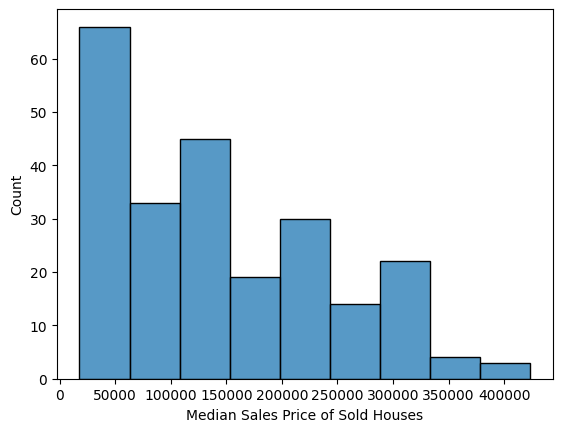

In [25]:
sns.histplot(df_AllCombined, x='Median Sales Price of Sold Houses')

It appears that the median sales price seems to be right skewed.

<Axes: xlabel='Federal Funds Rate', ylabel='Count'>

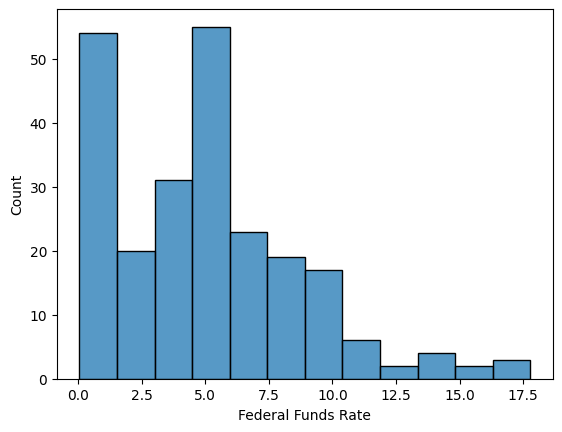

In [26]:
sns.histplot(df_AllCombined, x='Federal Funds Rate')

It appears that the federal funds rate is right skewed with a rather long tail in the higher rates. This may imply possible outliers in the dataset.

<Axes: xlabel='GDP Growth Rate', ylabel='Count'>

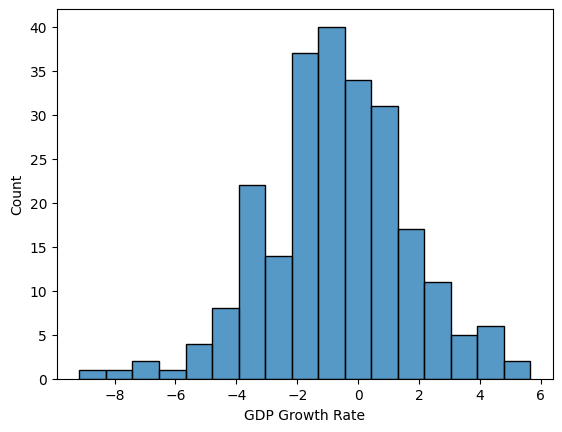

In [27]:
sns.histplot(df_AllCombined, x='GDP Growth Rate')

Interestingly enough, GDP Growth rate seems to look like a normal distribution.

<Axes: xlabel='Ratio: Houses for Sale to Houses Sold', ylabel='Count'>

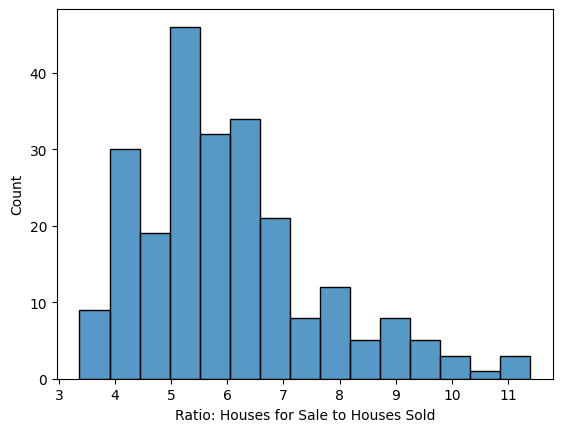

In [28]:
sns.histplot(df_AllCombined, x='Ratio: Houses for Sale to Houses Sold')

Another right skew distribution potential for outliers on the upper end.

**Step 3:** Plot each variable in a line plot by year to see trends. The following code will show us a plot of the Federal Funds Rate over the years. We want to see if that trend holds for our following graphs.

<Axes: xlabel='Year', ylabel='Federal Funds Rate'>

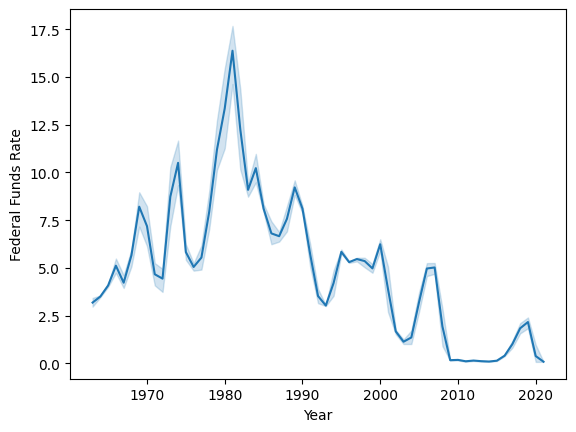

In [29]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Federal Funds Rate")

Here, we plotted the different hues set by quarter (Months 1, 4, 7, and 10) so we can see if there was a difference within winter, spring, summer, and fall months.

<Axes: xlabel='Year', ylabel='Federal Funds Rate'>

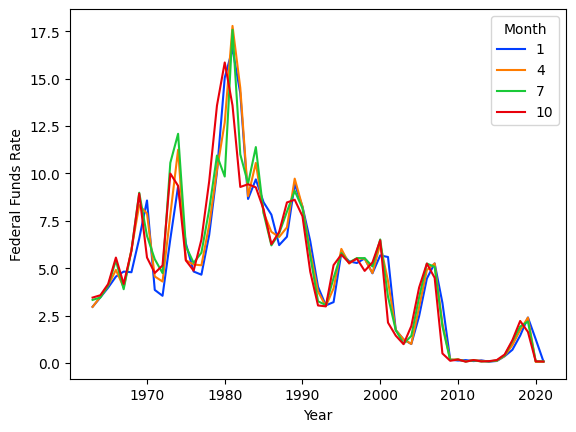

In [30]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Federal Funds Rate", hue = 'Month', palette = 'bright')

We decided view our data's GDP Growth Rate as well and plotted its growth / decline over the years.

An interesting to note from this line plot is that Federal Funds Rate spiked in the 1980s and has been on a downward trend ever since to the point where it is now at an all time low.

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

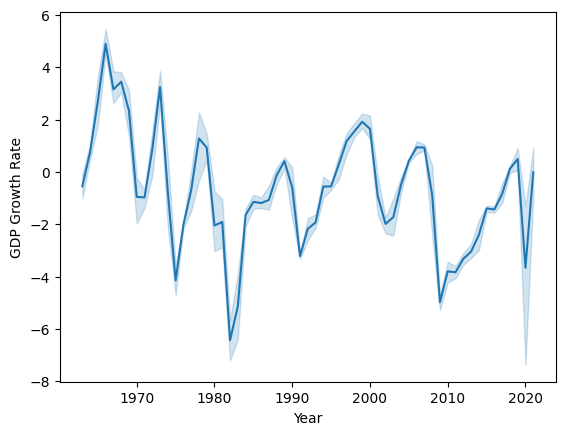

In [31]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "GDP Growth Rate")

We separated the GDP Growth Rate into different hues set by quarter (Months 1, 4, 7, and 10) in our lineplot to display any noticible differences between the months. GDP Growth Rate seems to have had a huge dip in 2020. We can infer that this is because of a pandemic, so it seems to be an outlier. However, it is a striking difference when compared to the previous 50 years of data that we've had. We will keep this in mind.

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

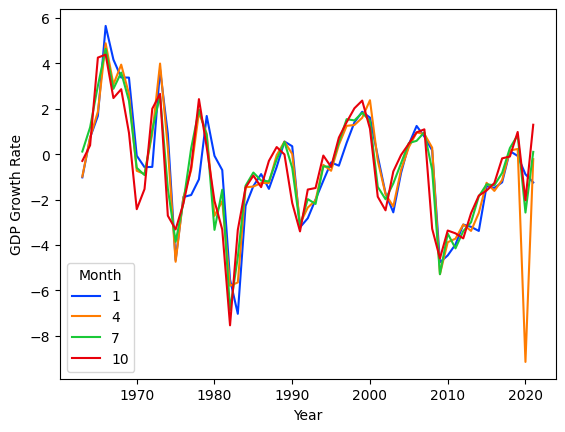

In [32]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "GDP Growth Rate", hue = 'Month', palette= 'bright')

This lineplot displays the ratio of houses for sale during the year and houses that were actually sold. We wanted to see which years had a lot of houses for sale but that weren't sold. The spikes should show the bad years for the housing market. The GDP Growth Rate has indeed declined over the years, but it does recover almost immediately when there are drastic drops, like with what we can see slightly after 1980, slightly before 2010, and immediately at the start of 2020.

<Axes: xlabel='Year', ylabel='Ratio: Houses for Sale to Houses Sold'>

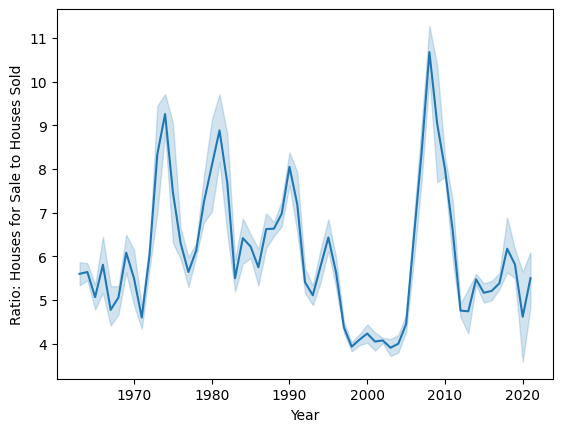

In [33]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Ratio: Houses for Sale to Houses Sold")

Similarly to previous plots, we also examine if there were any specific trends affected by the time of year it was, so we separate the lines into months.

<Axes: xlabel='Year', ylabel='Ratio: Houses for Sale to Houses Sold'>

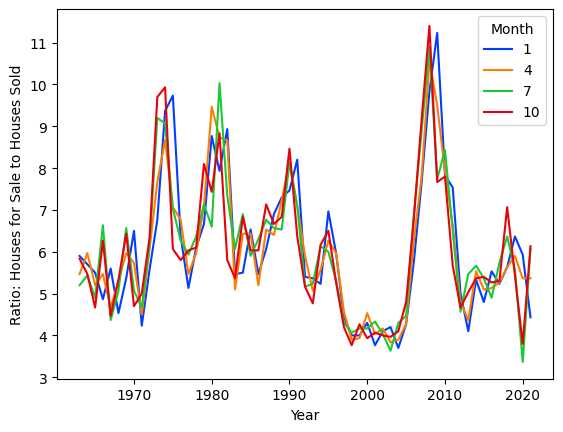

In [34]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Ratio: Houses for Sale to Houses Sold", hue = 'Month', palette = 'bright')

This lineplot is essential in determining how the median housing price has increased or decreased over the past 50 years. The spikes on our line graphs show the bad years for the housing market, and we can see that the decline is largely stable around the upward spike immediately before 2010, but also somewhat stable around the downward spike in 2020.

<Axes: xlabel='Year', ylabel='Median Sales Price of Sold Houses'>

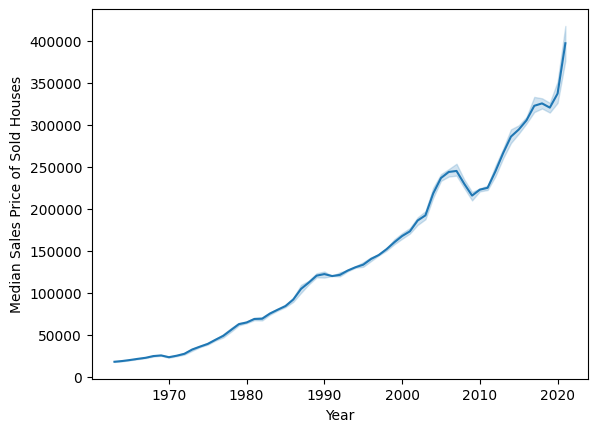

In [35]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Median Sales Price of Sold Houses")

Similarly, we look to see if the housing prices vary by season using hue. \\


<Axes: xlabel='Year', ylabel='Median Sales Price of Sold Houses'>

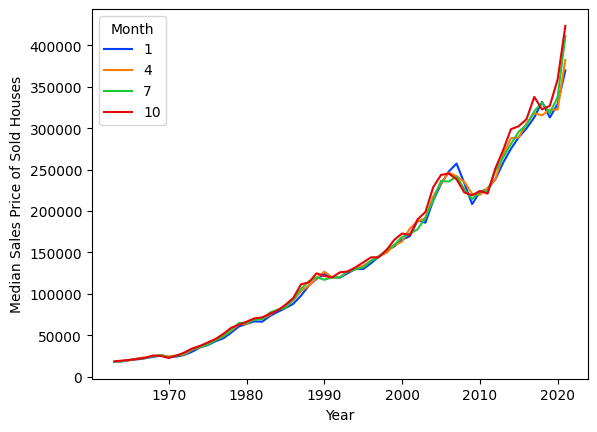

In [36]:
sns.lineplot(data = df_AllCombined, x = "Year", y= "Median Sales Price of Sold Houses", hue = 'Month', palette = 'bright')

**Step 4:** Plot the data in a scatter plot to see possible outliers. This scatter plot was made to plot all our data points and the sales prices they had that year.

<Axes: xlabel='Year', ylabel='Median Sales Price of Sold Houses'>

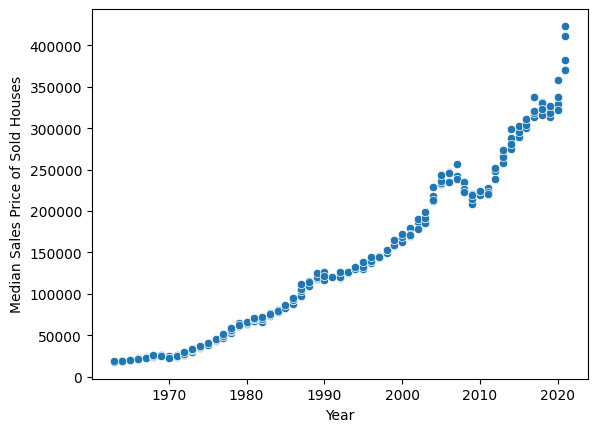

In [37]:
sns.scatterplot(x='Year', y='Median Sales Price of Sold Houses', data=df_AllCombined)

This scatterplot was made to display all the datapoints of the Ratio of houses for sale and houses sold. A scatterplot would better display clusters of data.

<Axes: xlabel='Year', ylabel='Ratio: Houses for Sale to Houses Sold'>

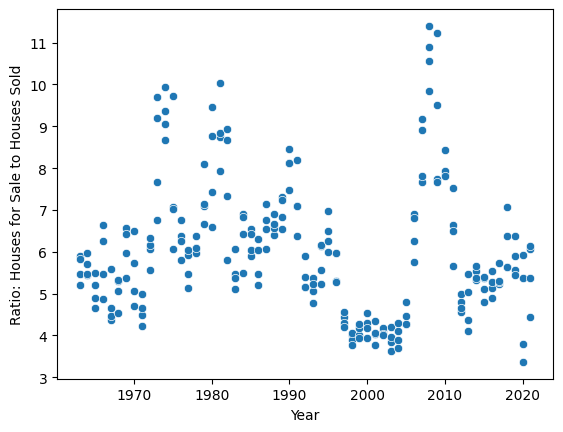

In [38]:
sns.scatterplot(x='Year', y='Ratio: Houses for Sale to Houses Sold', data=df_AllCombined)

We made this scatterplot to display our datapoints' growth rate. It will show us how much the GDP generally moved from year to year by examining the clusters.

<Axes: xlabel='Year', ylabel='GDP Growth Rate'>

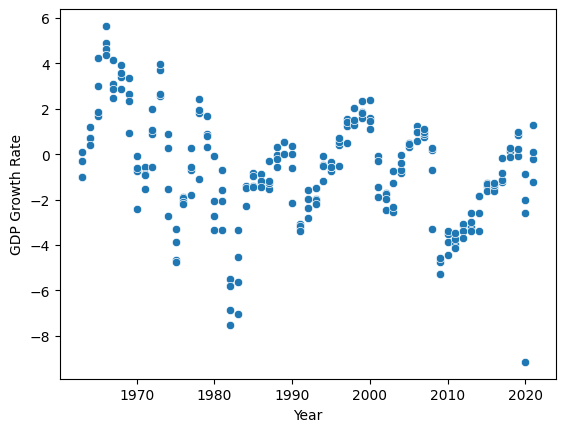

In [39]:
sns.scatterplot(x='Year', y='GDP Growth Rate', data=df_AllCombined)

From this scatterplot, there are 3 things that are interesting to note:
1. GDP Growth Rate has outliers. One around 1980, one around 2010, and one around 2020.
2. The drop in 2020 can be inferred to have been an effect of the pandemic, as we're going through it right now.
3. The drop in 2020 happened around month 4. (Second quarter.)

This scatterplot was made to display our datapoints for Federal Funds rate over the years. This will provide use with more information than just a line plot. We can see if the funds stayed at a certain point for a long period of time or only reached certain rates briefly over the years better.

<Axes: xlabel='Year', ylabel='Federal Funds Rate'>

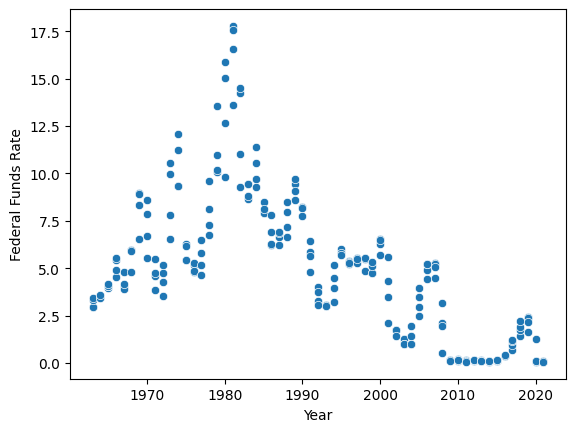

In [40]:
sns.scatterplot(x='Year', y='Federal Funds Rate', data=df_AllCombined)

This will show us the median sales prices of houses sold compared the federal funds rate. By using a scatterplot we hope to see if there is any relationship or trend between the two variables.

<Axes: xlabel='Federal Funds Rate', ylabel='Median Sales Price of Sold Houses'>

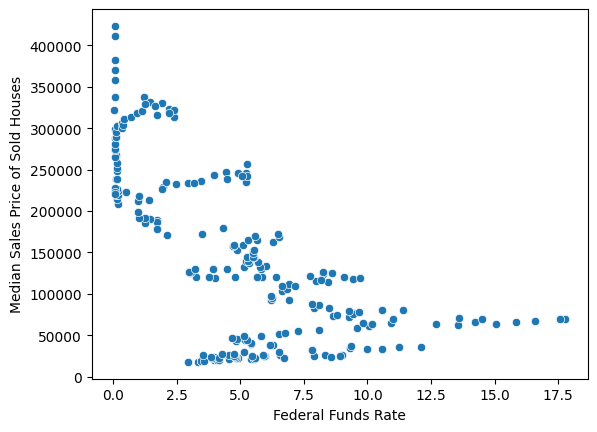

In [41]:
sns.scatterplot(x='Federal Funds Rate', y='Median Sales Price of Sold Houses', data=df_AllCombined)

This scatterplot displays the relationship between the Ratio of Houses for Sale and Sold to the Median Sales Price of Sold Houses. We want to see if there is a relationship / trend in that if the price rises or drops as there are more houses avalible that are not being bought.

<Axes: xlabel='Ratio: Houses for Sale to Houses Sold', ylabel='Median Sales Price of Sold Houses'>

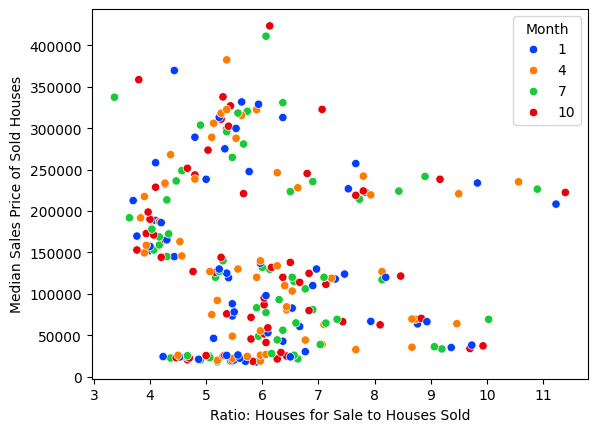

In [42]:
sns.scatterplot(x='Ratio: Houses for Sale to Houses Sold', y='Median Sales Price of Sold Houses', data=df_AllCombined, hue='Month', palette = 'bright')

Some things to take note of from this scatterplot:
1. Our biggest outlier for house sale ratio is right before 2010 between the first and second quarters of the year it happened in. This is likely due to The Great Recession in 2008.
2. Eyeballing the scatterplots, it seems that the Houses for Sale to Houses Sold does not seem to be correlated with Median House Prices.

This scatterplot displays the relationship between the GDP Growth Rate and Median Sales Price of Sold houses.

<Axes: xlabel='GDP Growth Rate', ylabel='Median Sales Price of Sold Houses'>

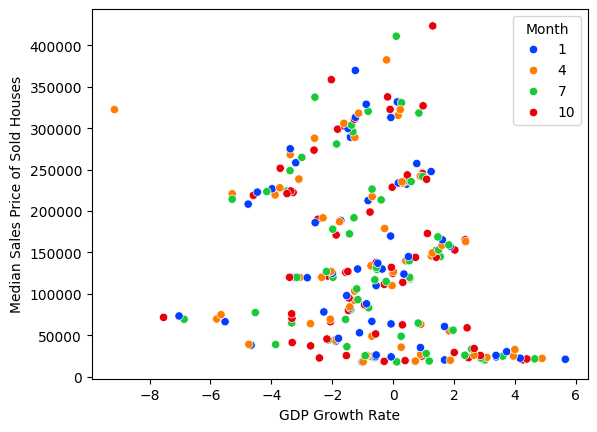

In [43]:
sns.scatterplot(x='GDP Growth Rate', y='Median Sales Price of Sold Houses', data=df_AllCombined, hue='Month', palette = 'bright')

Looking at the GDP Growth and Median House Prices scatterplot, we can see that the two variables seem to have a loosely negative relationship.

**Step 5:** Do a linear regression to explore relationship between median home price and other variables.

In [44]:
# Regress the ratio of houses for sale to houses sold on the median sales price of sold houses
reg_df = df_AllCombined[['Median Sales Price of Sold Houses', 'Ratio: Houses for Sale to Houses Sold']]
reg_df.columns = ['price', 'inventory']
outcome, predictors = patsy.dmatrices('price ~ inventory', reg_df)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.189
Date:                Wed, 24 Apr 2024   Prob (F-statistic):             0.0236
Time:                        05:31:32   Log-Likelihood:                -3053.3
No. Observations:                 236   AIC:                             6111.
Df Residuals:                     234   BIC:                             6118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.996e+05   2.58e+04      7.732      0.0

In [45]:
# Regress the federal funds rate on the median sales price of sold houses
reg_df2 = df_AllCombined[['Median Sales Price of Sold Houses', 'Federal Funds Rate']]
reg_df2.columns = ['price', 'funds']
outcome, predictors = patsy.dmatrices('price ~ funds', reg_df2)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.68e-29
Time:                        05:31:32   Log-Likelihood:                -2992.4
No. Observations:                 236   AIC:                             5989.
Df Residuals:                     234   BIC:                             5996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.298e+05   8440.663     27.226      0.0

In [46]:
# Regress the GDP growth rate on the median sales price of sold houses
reg_df3 = df_AllCombined[['Median Sales Price of Sold Houses', 'GDP Growth Rate']]
reg_df3.columns = ['price', 'gdp']
outcome, predictors = patsy.dmatrices('price ~ gdp', reg_df3)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.19
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           0.000345
Time:                        05:31:32   Log-Likelihood:                -3049.4
No. Observations:                 236   AIC:                             6103.
Df Residuals:                     234   BIC:                             6110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.358e+05   6747.195     20.127      0.0

In [47]:
# Regress the GDP growth rate on the median sales price of sold houses
reg_df4 = df_AllCombined[['Median Sales Price of Sold Houses', 'Year']]
reg_df4.columns = ['price', 'year']
outcome, predictors = patsy.dmatrices('price ~ year', reg_df4)

mod_log = sm.OLS(outcome,predictors)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     4233.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          7.56e-152
Time:                        05:31:32   Log-Likelihood:                -2707.9
No. Observations:                 236   AIC:                             5420.
Df Residuals:                     234   BIC:                             5427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.144e+07   1.78e+05    -64.254      0.0

Aside from regressing year on median house price and perhaps federal funds rate on median house price, regression on other variables seem to have very low R-squared. It would be in our best interest to check the correlation between variables by creating a heatmap of the correlation matrix.

<Axes: >

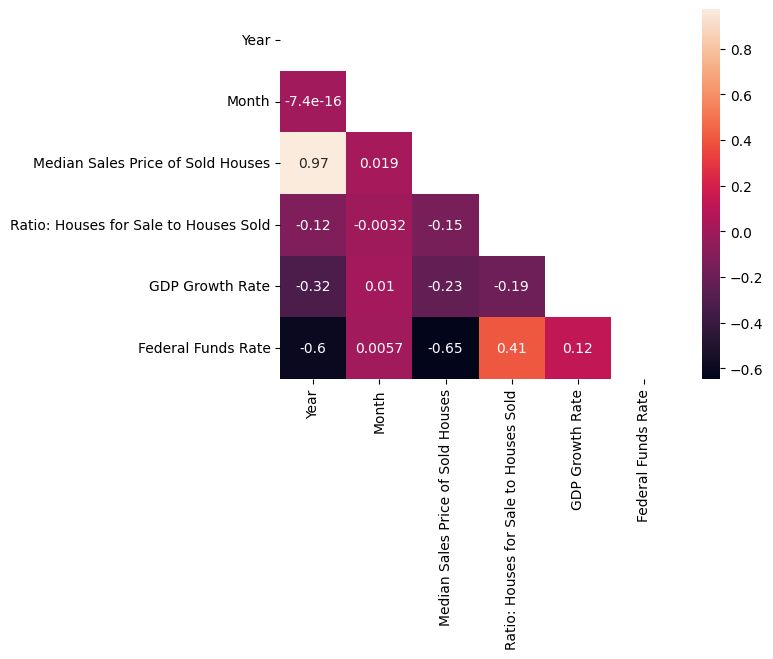

In [48]:
# Create a correlation matrix heatmap to visualize the correlation between variables (Sliced due to the year and month column)
corr_mat = df_AllCombined.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
heat_map = sns.heatmap(corr_mat, mask=mask, annot = True)
heat_map

As seen in the correlation heatmap, we can see that most of the variables are actually not that well correlated with each other. The only one with a somewhat strong correlation with median sales price of sold homes is the federal funds rate with a negative correlation of -0.65. We also see that median sales price of sold homes is heavily correlated with year. This makes sense because of the upward trend that we saw in the lineplots in the earlier portion of this section.

# Analysis

With the essential parts of our EDA done, we can now provide our interpretations of the output. It seems as though the Federal Funds Rate has noticeably declined over the years. But why? Can this get us closer to finding out what macroeconomic factor to consider the most when buying houses? We think this can.

We wanted to see which years had a lot of houses for sale but weren't sold. Housing prices seem to have gone up due to the lack of housing sales and a stagnant supply of houses; therefore, we know there is a correlation between house prices and the housing supply now. However, because we are looking at the ratio of houses for sale / houses sold, we cannot be certain whether the influence is coming from a decrease in housing supply or an increase in housing demand, both of which are distinct possibilities.

From there, we can confirm that our graphs visualizing the GDP Growth Rate is accurate. We may not have a correlation between housing supply ratio and GDP Growth Rates, so that means there may not exactly be a correlation between house pricing and GDP Growth Rates. If anything, it would be loosely correlated.

There does seem to be a negative relationship between the housing price and Federal Funds Rate though. By regressing the federal funds rate on the median housing price, we can see that the R-squared value is 0.41 meaning that about 41% of the variance in the data is captured when regressing Federal Funds Rate on Median Home Price and that the beta found is -1.755e+04 which is statistically significant due to the 0.000 p-value, so this is something to keep in mind. There is, however, a stronger correlation for increasing housing prices has to be its relationship with the current year. Even though this has a R-squared value of 0.949, this information may not be as useful, but it's good to confirm that there is a positive trend. Despite this, it seems that the overall result of everything that happens in a year tends to increase housing price each year. A confounding variable could be inflation, but overall housing prices are heavily correlated with the year.

We also examined other variables and compared them to housing prices, like the Ratio of Houses for Sale and Houses Sold. Surpisingly, the R-squared value was very low at only 0.021. However, the beta found, -9328.0235 was statistically significant at alpha 0.05 level but not at the 0.01 level. Assuming alpha 0.05, we can say that the beta is statistically significant.

Overall, it can be confirmed that every year the median prices of housing does seem to go up. We can also see that within the years, Federal Funds Rate has decreased and that there does seem to be a negative relationship between housing prices and the Federal Funds Rate. However, it appears that GDP Growth and Median Sale Price for Houses Sold weren't as correlated as expected.  Even during the outlier month where GDP Growth dipped, housing prices did not seem to be affected. Ratio of Houses for Sale and Sold suffers an even weaker correlation.

# Model Building

First, we want to regress all of our predictors on the median price to see if the predictors are statistically significant.

In [49]:
df_AllCombined1 = df_AllCombined.copy()
df_AllCombined1.columns = ['year', 'month', 'price', 'supply', 'gdp', 'ffr']
outcome1, predictors1 = patsy.dmatrices('price ~ ffr + gdp + supply', data=df_AllCombined1)
model1 = sm.OLS(outcome1, predictors1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     62.67
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.03e-29
Time:                        05:31:33   Log-Likelihood:                -2985.9
No. Observations:                 236   AIC:                             5980.
Df Residuals:                     232   BIC:                             5994.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.898e+05   1.97e+04      9.650      0.0

From the regression results, it appears that the other variables excluding supply are statistically significant, so this means that we can remove this variable from our regression without affecting R-squared much.

Now we build and train our model with the predictors that we found to be statistically significant.

In [50]:
# Partition the dataset into a training and test
training_val = int(len(df_AllCombined)*.8)
testing_val = len(df_AllCombined) - training_val
train_X = df_AllCombined.iloc[:training_val, 3:]
test_X = df_AllCombined.iloc[-testing_val:, 3:]
train_Y = df_AllCombined.iloc[:training_val, 2]
test_Y = df_AllCombined.iloc[-testing_val:, 2]
training_set = pd.concat([train_X, train_Y], axis=1)
testing_set = pd.concat([test_X, test_Y], axis=1)
training_set.columns = ['supply', 'gdp', 'ffr', 'price']
testing_set.columns = ['supply', 'gdp', 'ffr', 'price']

In [51]:
# Regress price on Federal Funds rate and GDP Growth
outcome2, predictors2 = patsy.dmatrices('price ~ ffr + gdp', data=training_set)
model2 = sm.OLS(outcome2, predictors2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     22.49
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.81e-09
Time:                        05:31:33   Log-Likelihood:                -2343.6
No. Observations:                 188   AIC:                             4693.
Df Residuals:                     185   BIC:                             4703.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.552e+05   9584.241     16.191      0.0

R-squared seems to be significantly low at 21.2% of the variance explained by the model. We will keep this in mind.

In [52]:
# Make predictions using our model and find the mean squared predicted error
pred_train_Y = model2.predict(train_X)
mse_model = ((pred_train_Y - train_Y)**2)
mse_model

0      7.940074e+11
1      6.779028e+11
2      5.935844e+11
3      7.588138e+11
4      7.078480e+11
           ...     
183    2.473283e+12
184    2.482460e+12
185    1.686713e+12
186    1.063638e+12
187    1.020825e+12
Length: 188, dtype: float64

In [53]:
# Predict values using our model and take the Mean Squared Predicted Error
pred_test_Y = model2.predict(test_X)
mspe_model2 = ((pred_test_Y - test_Y)**2)
mspe_model2

188    1.063168e+12
189    1.091159e+12
190    1.241571e+12
191    1.029422e+12
192    9.528923e+11
193    6.945766e+11
194    6.742495e+11
195    4.739753e+11
196    3.182655e+11
197    2.835792e+11
198    2.389544e+11
199    2.541949e+11
200    1.641553e+11
201    1.923442e+11
202    3.713540e+11
203    2.807059e+11
204    3.383739e+11
205    3.514354e+11
206    3.772019e+11
207    3.017953e+11
208    2.184506e+11
209    2.628525e+11
210    3.001806e+11
211    3.010156e+11
212    3.248554e+11
213    2.528083e+11
214    2.176067e+11
215    2.653590e+11
216    2.562047e+11
217    2.540427e+11
218    3.252477e+11
219    2.301975e+11
220    2.846528e+11
221    3.002721e+11
222    4.154058e+11
223    5.821117e+11
224    4.395135e+11
225    3.345232e+11
226    2.771671e+11
227    2.487386e+11
228    3.514657e+11
229    3.483931e+11
230    4.284659e+10
231    6.166273e+10
232    1.079984e+11
233    2.040374e+11
234    2.796442e+11
235    2.665571e+11
dtype: float64

Note that the mean squared error is extremely high in both training and test datasets. This means that the model is, unfortunately, not good for prediction.

# Ethics & Privacy

All of our data comes from publicly available data provided by the Federal Reserve's website, so, in terms of privacy, this project is very unlikely to violate anyone's privacy. As far as ethics is concerned, one might use this data to predict the median price for the housing market at some point in the future and buy it, which may make it so that there are less homes for sale preventing the average homebuyer from buying a home at an affordable price.

# Conclusion & Discussion

Due to a lack of variables, especially ones that are more correlated with median housing price to regress on, it appears that we have failed to create a "proper" prediction model that can predict a given year's housing price given certain macroeconomic factors. We need to keep in mind that our dataset was not a large dataset specifically made for machine learning projects. In our case, we manually acquired and cleaned the data ourselves from four separate online sources and put them together, with only 236 rows of data that's hard to train on for a strong model. As the Professor said, we would need more people collecting and creating good machine learning friendly datasets because, here, we can see that it does not *always* work all the time with smaller datasets that don't sport a strong correlation. But fortunately, this does not mean that all of our work was for nothing. Our project appears to have **uncovered many insights** that — to our surprise — seem to be *not* too well-documented.

From our analysis, we were able to make a number of observations. First and foremost, we concluded that the strongest correlation between our datasets and their years was the relationship between Median Prices of homes sold and the year. The median price of houses sold was almost always increasing, and only ever lowered during events of major significance, like the 2008 recession or the instability caused by the start of COVID-19. From this we can gather that for the most part housing prices will always be in an upward trend, and that they will only decrease in severe situations that critically impact the economy.

We continued to find other important factors that impacted housing prices aside from that. The strongest negative correlation was found between median housing prices and Federal Funds Rate. From our comparison graph, we observed that the highest value median house prices were present when the Federal Funds Rate was at or near 0, and that, as it increased, the prices of houses sold would lower, to the point that our graph displays that the median price of houses sold falls below 100,000 when Federal Funds Rate goes above 12.5 percent, and that the median price of houses sold approaches 400,000 when the Federal Funds rate is at or near 0. This supports part of our hypothesis and our real world understanding, as taking out loans and morgages is an important part of buying a house, and someone wouldn't want to take out a loan to buy (for example) a 400,000 dollar house when the interest rate is above 10%. However, contrary to our hypothesis, we did not find a strong negative correlation between median housing price and housing supply, and we were unable to find a truly valuable correlation between GDP values and housing prices as well. In analyzing the correlation between median housing price and housing supply, we saw that when the ratio of houses for sale to houses sold was highest, meaning the highest supply and lowest demand, median housing prices were at around 250,000. Meanwhile, at much lower ratios we saw many median housing prices at around 50,000. Overall, the comparison graph did not show a decreasing trend in its datapoints, but funnily there did seem to be a gap in the datapoints on the price axis suggesting that house prices retain their value despite the supply and demand at the time. This makes reasonable sense after some research, where we discovered that not all goods are susceptible to the laws of supply and demand. Finally, it seems that there was very little correlation between GDP and median housing prices. Median housing prices were at its highest when the GDP growth rate was negative, and when the GDP growth rate was at its highest, we found that the median housing price was under 50,000. Although its unclear why GDP growth rate wouldn't have an impact on median housing price, perhaps analyzing GDP per capita instead would have been better as that means people, individually, have more purchasing power so that may affect the median housing price more.

An interesting point to note as well is the postive correlation between federal funds rate and the housing supply ratio. Measured as the number of houses for sale over the number of houses sold, the supply ratio increased (meaning either more houses were listed for sale or less were sold within a given month) alongside the Federal Funds rate with a greater degree of correlation than was present within most of the comparisons of our secondary data sets. We believe this correlation to arise from a decrease in buyers within the supply ratio rather than an increase in sellers. There is no benefit to selling a house during a period with a high Federal Funds Rate, but there are disadvantages to buying one during that same period, thus we can conclude that not only does median housing price decrease as the Federal Funds rate increases, but the number of homes purchased likely decreases as well.

For the limitations of our project, it is important to initially recognize the scope of our project may play a role in hindering understanding. Housing in different states can vary drastically and influence Median Sales Price and Monthly Supply to different degrees. A given state's population, minimum wage, and land use all contribute heavily to housing. Overall, the housing market is a very complex and dynamic system. What comes as a headache for some can lead others to large profits because, in the end, the housing market is tantamount to that of a large-scale business. Creating a deterministic model for the entirety of a system so intricate will prove to be nearly impossible. For example, regardless of how well macroeconomic variable may predict housing prices, no model can account for a sudden economic shock such as COVID-19. Another limitation is the lack of predictors to be used. Initially, we did consider using Consumer Price Index (a way to measure inflation) and unemployment rate as predictors. However, we were afraid that there would be potential multicolinearity with GDP growth, inflation, and unemployment.

As for our project's societal impact, it is unlikely that our project will be relevant / usable to real estate, considering the fact that our model failed to predict properly. However, the housing market has been around and been studied for a very long time, so, although we may be unable to contribute any new information to its trends as a result of our failed prediction efforts, our project and its results seem usable enough to likely validate and concur with previously published work.